# Lab de moderna

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import Planck, electron_mass, e
from scipy import stats

In [2]:
R = 6.5*1e-2
carga = e
h = Planck
me = electron_mass

data = {
    'D1': np.array([19.1,22.6,25.7,26.8,30.1])*1e-3,
    'D2': np.array([35.2,42.7,43.8,47.1,50.6])*1e-3,
    'V': np.array([6.74,4.23,4.02,3.66,2.95])*1e3
}

In [3]:
df = pd.DataFrame(data)
df

,D1,D2,V
0,0.0191,0.0352,6740.0
1,0.0226,0.0427,4230.0
2,0.0257,0.0438,4020.0
3,0.0268,0.0471,3660.0
4,0.0301,0.0506,2950.0


In [4]:
def lab_moderna(x,y,x_max,y_max,xlabel,ylabel,title):
    # PASSO 2: gerar polinômio (forçando o intercepto na origem)
    coeficientes = np.polyfit(x, y, 1, full=False, cov=False)
    polinomio = np.poly1d(coeficientes)
    #slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # PASSO 3: gerar variáveis para R^2
    y_experimental = y
    y_ajuste = polinomio(x)

    # PASSO 4: definir R^2
    '''
    def R_2(y_experimental, y_ajuste):
        s_q_r = np.sum((y_experimental - y_ajuste)**2)   # Soma dos Quadrados Resíduos
        s_t_q = np.sum((y_experimental - np.mean(y_experimental))**2)   # Soma Total dos Quadrados
        return 1 - (s_q_r) / (s_t_q)
    '''
    # PASSO 5: definir variáveis para o gráfico
    x_grafico = np.linspace(min(x), max(x), 100)
    y_grafico = polinomio(x_grafico)

    x_grafico2 = np.linspace(0, 1e5, 100)
    y_grafico2 = x_grafico2*coeficientes[0]

    plt.ylim(0,y_max)
    plt.xlim(0,x_max)
    
    xl = np.linspace(-1,10,100)
    yl = coeficientes[0]*xl
    # PASSO 6: plotar dados e linha de tendência
    #plt.style.use('seaborn-v0.8')
    plt.scatter(x*1e4, y*1e4, color='blue', label='Dados')
    plt.title(f'{title}', fontsize=14, weight='bold')
    #plt.xticks(np.unique(x)*1e4)  # Ajustar os ticks no eixo x para os valores únicos
    #plt.yticks(np.unique(y)*1e4)  # Ajustar os ticks no eixo y para os valores únicos
    plt.xlabel(f'{xlabel}', fontsize=14, weight='bold')
    plt.ylabel(r'{}'.format(ylabel), fontsize=14, weight='bold')
    plt.plot(x_grafico2*1e4, y_grafico2*1e4, color='green')
    plt.plot(x_grafico*1e4, y_grafico*1e4, color='red', label=f'D = {coeficientes[0]:.2f}/V')
    plt.legend()
    #plt.xticks(np.arange(min(x), max(x) + tick_spacing, tick_spacing))
    #plt.plot(xl,yl)
    plt.show()
    
    coef = coeficientes[0]
    num = 8*h**2*R**2
    den = 2*me*carga*coef

    d = np.sqrt(num/den)
    d_ang = d * 1e10
    #print(d)
    print('O valor da variavel d é: {:.2f} A'.format(d_ang))
    #print(f'{d_ang:.2e}')
    
    #return d_ang

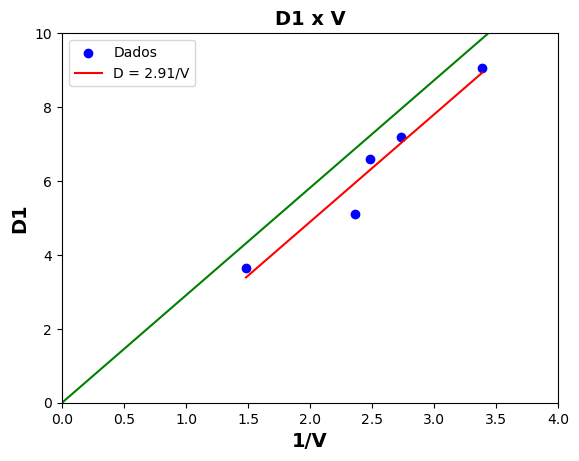

O valor da variavel d é: 1.32 A


In [5]:
y1 = df['D1']**2
x1 = 1/df['V']

lab_moderna(x1,y1,x_max=4,y_max=10,xlabel='1/V',ylabel='D1',title='D1 x V')

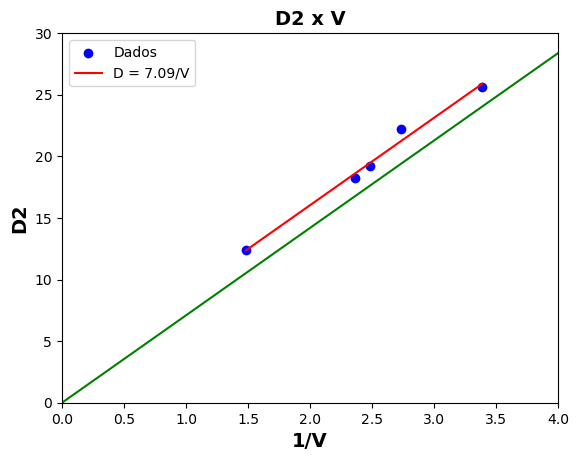

O valor da variavel d é: 0.85 A


In [6]:
y2 = df['D2']**2
x2 = 1/df['V']

lab_moderna(x2,y2,x_max=4,y_max=30, xlabel='1/V',ylabel='D2',title='D2 x V')

In [7]:
valor_experiental=0.85/1.32
valor_real = 1.23/2.13

In [8]:
valor_experiental

0.6439393939393939

In [9]:
valor_real

0.5774647887323944

In [11]:
erro_relativo = abs(valor_experiental-valor_real)/valor_real
erro_relativo_percentual = erro_relativo*100

In [12]:
print(f'{erro_relativo_percentual:.2f}','%')

11.51 %
